In [73]:
import matplotlib.pyplot as plt
import numpy as np
from math import ceil
from scipy.interpolate import interp1d
from scipy import integrate
from scipy.integrate import odeint

In [74]:
def rocket_lab_program():
    
    NEWTONS_PER_COUNT = 10
    NEWTONS_PER_GRAM = 101.97162
    file_name_end = (input("File in Log Rocket Data? (Without .txt): "))
    time_to_end= float(input("Total Time Analyzed (s)?: "))
    propellant_mass_g = float(input("Propellant Mass (g)?: "))
    dry_mass_g = float(input("Dry Mass (g)?: "))
    total_mass_g = float(propellant_mass_g + dry_mass_g)
    percent_threshold = float(input("Start Threshold Percent (decimal)?: "))
    Cd= float(input("Cd?: "))
    A= float(input("Crossectional Area (m^2)?: "))
    rho= float(input("Air Density (kg/m^3)?: "))
    Answer_Save_Graph= (input("Save Thrust Graph? (Yes/No)"))
    Answer_Save_Data= (input("Save Thrust Data? (Yes/No)"))
    propellant_mass = 0.001 * propellant_mass_g
    propellant_mass = 0.001 * propellant_mass_g
    dry_mass= 0.001 * dry_mass_g
    total_mass = 0.001 * total_mass_g
    percent_threshold_100 = (percent_threshold * 100)
    str_threshold = str(percent_threshold_100)
    str_thrsehold = (str_threshold)
                                  
    MOTOR_CLASSES = [
    ('1/8A',0),
    ('1/4A',0.3126),
    ('1/2A',0.626),
    ('A',1.26),
    ('B',2.52),
    ('C',5.02),
    ('D',10.01),
    ('E',20.02),
    ('F',40.02),
    ('G',80.02),
    ('H',160.02),
    ('I',320.01),
    ('J',640.01),
    ('K',1280.01),
    ('L',2560.01),
    ('M',5120.01),
    ('N',20480.01),
    ('O',40960.01)
    ]


    start_time = None
    max_thrust = 0.0
    total_impulse = 0.0
    motor_class = ""
    file_name_full = "/Users/augustzentner/Downloads/RocketTestStand-main/Log Rocket Data/" + file_name_end
    with open(file_name_full + ".TXT") as f:
        lines = f.read().split()
        #print('lines = ',lines)
        #print('  > The start_time is ',start_time)
        for line in lines:
            x,y = line.split(',')
            x,y = float(x),float(y)
            y = y / NEWTONS_PER_COUNT
            if y> max_thrust:
                max_thrust = y
        data = []
        for line in lines:
            #print(' The line is ',line)
            x,y = line.split(',')
            x,y = float(x),float(y)
            #print('       x = ',x)
            y = y / NEWTONS_PER_COUNT
            #print('       y = ',y)
            
            start_threshold = float(max_thrust * percent_threshold)
            stop_threshold = float(max_thrust * percent_threshold)
            
            data.append([x,y])
                #print('Appending data right now')
            try:
                total_impulse += y * (xvalue-data[-2][0])
            except:
                pass
            if y > max_thrust:
                max_thrust = y
        
    x_lst = [d[0] for d in data]
    y_lst = [d[1] for d in data]
    
    x_lst = np.array(x_lst)
    y_lst = np.array(y_lst)
    
    is_it_true = y_lst > start_threshold
    i_where = np.flatnonzero(is_it_true)
    
    x_length = len(x_lst)
    
    x_1 = x_lst [i_where[0]-1]
    x_2 = x_lst [i_where[0]]
    
    y_1 = y_lst [i_where[0]-1]
    y_2 = y_lst [i_where[0]]
    
    
    x_t1 = ((x_2 - x_1)/(y_2 - y_1))*(start_threshold - y_1) + x_1
    
    x_1 = x_lst [(i_where[-1])]
    x_2 = x_lst [(i_where[-1]+1)]
    
    y_1 = y_lst [(i_where[-1])]
    y_2 = y_lst [(i_where[-1]+1)]
    
    x_t2 = ((x_2 - x_1)/(y_2 - y_1))*(start_threshold - y_1) + x_1
    
    x_lst = x_lst[(i_where[0]-1):(i_where[-1]+1)]
    y_lst = y_lst[(i_where[0]-1):(i_where[-1]+1)]
    
    x_lst[0] = x_t1
    x_lst[-1] = x_t2
    x_lst= x_lst - x_t1
    
    y_lst[0] = start_threshold
    y_lst[-1] = stop_threshold
    
    n_step_max=5000
    
    initial_t = np.min(x_lst)
    final_t = np.max(x_lst)
    
    interp_func_th2 = interp1d(x_lst, y_lst)
    [total_impulse,impulse_error] = integrate.quad(interp_func_th2,initial_t,final_t,limit=n_step_max)
    
    for val in MOTOR_CLASSES:
        c,imp = val
    
        if total_impulse > imp:
            motor_class = c
    
    Impulse_per_Gram = total_impulse / propellant_mass_g

    #print('The value of x_lst is ',x_lst)
    burn_time = np.max(x_lst)
    
    dt = 0.092
    x_add = np.linspace(np.max(x_lst)+dt, time_to_end, int(time_to_end/0.092))
    y_add = np.zeros(np.shape(x_add))
    
    x_lst = np.append(x_lst, x_add)
    y_lst = np.append(y_lst, y_add)
    
    t_initial = np.min(x_lst)
    t_final = np.max(x_lst)
    
    t_initial = initial_t
    t_final = final_t


    return (x_lst, y_lst, propellant_mass, initial_t, final_t, t_initial, t_final, propellant_mass_g, max_thrust, total_impulse, Impulse_per_Gram, motor_class, burn_time, Answer_Save_Graph, Answer_Save_Data, file_name_full, percent_threshold, str_threshold, file_name_end, dry_mass, dry_mass_g, total_mass, total_mass_g, Cd, A, rho)

In [75]:
def interp_func_th_program(x_lst,y_lst):
    
    interp_func_th = interp1d(x_lst, y_lst)
    return interp_func_th

In [76]:
def get_mass_derivative_constant(interp_func_th,t_initial,t_final,dry_mass,total_mass):
    '''
    Get the constant in the mass derivative.
    '''
    
    n_step_max=5000
    
    [total_impulse_2,impulse_error] = integrate.quad(interp_func_th,t_initial,t_final,limit=n_step_max)
    mass_derivative_constant = (1.0/(dry_mass - total_mass)) * total_impulse_2
    
    return mass_derivative_constant

In [77]:
def mass_derivative(interp_func_th, mass_derivative_constant, x_lst):
    
    dmdt = interp_func_th(x_lst)/mass_derivative_constant
    return dmdt

In [78]:
def mass_func_program(mass_derivative, t_initial, x_lst,total_mass, interp_func_th):

    mass_list=np.array([])

    for t in x_lst:
    
        [impulse,error] = integrate.quad(interp_func_th, initial_t, t,limit=500)
    
        mass = 1.0*impulse/mass_derivative_constant + total_mass
    
        mass_list=np.append(mass_list, mass)
    
    mass_function=interp1d(x_lst, mass_list, 'cubic')
    
    return mass_function, mass_list

In [79]:
def drag_force(v, Cd, rho, A):
    
    fd=0.5*Cd*rho*A*(v**2)
    
    return fd

In [80]:
def dvdt_program(v, t, interp_func_th, mass_function, mass_derivative_constant, dry_mass, final_t, Cd ,rho ,A):
    
    gravity = 9.8067    # in m/s^2
    
    if ( t>final_t): 
        # only gravity and drag
        mass= dry_mass
        fg = 1.0*gravity # this is the force of gravity
        # the drag force need to always be in the opposite direction of motion
        fd = drag_force(v, Cd, rho, A)/mass
        if ( v < 0.0 ):
            fd=-1.0*fd
        derivative = -fg -fd
        return derivative
    
    else:
        mass = mass_function(t) # this gives the instantaneous mass
    
        fth = interp_func_th(t)/mass # this is the thrust/mass
    
        dmdt = fth/mass_derivative_constant # this is dm/dt
    
        fdm = v*dmdt/mass # this is the extra piece for the changing mass
    
        fg = 1.0*gravity # this is the force of gravity
    
        # the drag force need to always be in the opposite direction of motion
        fd = drag_force(v, Cd, rho, A)/mass
        if ( v < 0.0 ):
            fd=-1.0*fd
        
        dvdt = fth - fg - fd - fdm
    
        return dvdt

In [81]:
def speed_program( x_lst, interp_func_th, mass_function, mass_derivative_constant, dry_mass, final_t, Cd ,rho ,A):

    args=(interp_func_th, mass_function, mass_derivative_constant, dry_mass, final_t, Cd ,rho ,A)
    
    speed = odeint(dvdt_program,0.0,x_lst,args)

    speed_list=speed[:,0]

    idx=np.where(speed_list>0.0)

    for ii in range(idx[0][0]):
        speed_list[ii]=0.0
        
    speed_function = interp1d(x_lst,speed_list,'cubic')
    
    return speed_list, speed_function, idx

In [82]:
def height_program(x_lst, speed_function, speed_list, initial_t):
    height=np.array([])
    for t in x_lst:
        [h,err]=integrate.quad(speed_function,initial_t,t)
        height=np.append(height,h)
    height_function = interp1d(x_lst,speed_list)
    return height_function, height

In [83]:
def thrust_data_apend(x_lst, y_lst, file_name_full, str_threshold, Answer_Save_Data, file_name_end):
    if Answer_Save_Data == ("Yes" or Answer_Save_Data == "yes" or Answer_Save_Data == "1" or Answer_Save_Data == "YES") :
        
        np.set_printoptions(suppress=1)
        
        x_array = np.array (x_lst)
        y_array = np.array (y_lst)
        
        np.around (x_array, decimals = 3, out= x_array)
        np.around (y_array, decimals = 3, out= y_array)
        
        out_data = np.stack((x_array, y_array), axis = -1)
        
        open(file_name_full + "_apend_" + str_threshold + "%" + ".TXT", 'w').close()
        np.savetxt( file_name_full + "_apend_" + str_threshold + "%" + ".TXT" , (out_data), fmt = '%3.3f', delimiter = ', ')
    

In [84]:
def thrust_graph(x_lst, y_lst, max_thrust, propellant_mass_g, total_impulse, Impulse_per_Gram, motor_class, initial_t, burn_time, Answer_Save_Thrust, file_name_full, str_threshold, file_name_end):
      
    fig, ax = plt.subplots(figsize=(10,6))
    plt.plot(x_lst,y_lst)
    plt.title("Thrust Curve")
    plt.ylabel("Thrust (Newtons)")
    plt.xlabel("Time (seconds)")        
    plt.grid(which='major', axis='both')
    plt.xlim(0,burn_time)
    plt.ylim(0,ceil(max_thrust))
    text_str = "Propellant Mass: %.f g" % propellant_mass_g
    text_str += "\nBurn Time: %.2f s" % burn_time
    text_str += "\nMax Thrust: %.2f N" % max_thrust
    text_str += "\nTotal Impulse: %.2f N%ss" % (total_impulse, u"\u00B7")
    text_str += "\nImpulse per gram: %.2f (N%ss)/g" % (Impulse_per_Gram, u"\u00b7")
    text_str += "\nMotor Class: %s" % motor_class
    plt.text(0.75, 0.97, text_str, transform=ax.transAxes,
        verticalalignment='top', bbox=dict(facecolor='white'))
    
    if Answer_Save_Graph == ("Yes" or Answer_Save_Graph == "yes" or Answer_Save_Graph == "1" or Answer_Save_Graph == "YES") :
        plt.savefig( "/Users/augustzentner/Downloads/RocketTestStand-main/Graphs and Slides/" + file_name_end+ "_Graph_" + str_threshold + "%" + ".PDF", format= "pdf")
    plt.show()

In [85]:
def thrust_graph2(x_lst, y_lst, max_thrust, propellant_mass_g, total_impulse, Impulse_per_Gram, motor_class, intial_t, burn_time, Answer_Save_Thrust):
      
    fig, ax = plt.subplots(figsize=(10,6))
    plt.plot(x_lst,y_lst)
    plt.title("Thrust Curve")
    plt.ylabel("Thrust (Newtons)")
    plt.xlabel("Time (seconds)")        
    plt.grid(which='major', axis='both')
    plt.xlim(0,burn_time)
    plt.ylim(0,ceil(max_thrust))
    text_str = "Propellant Mass: %.f g" % propellant_mass_g
    text_str += "\nBurn Time: %.2f s" % burn_time
    text_str += "\nMax Thrust: %.2f N" % max_thrust
    text_str += "\nTotal Impulse: %.2f N%ss" % (total_impulse, u"\u00B7")
    text_str += "\nImpulse per gram: %.2f (N%ss)/g" % (Impulse_per_Gram, u"\u00b7")
    text_str += "\nMotor Class: %s" % motor_class
    plt.text(0.75, 0.97, text_str, transform=ax.transAxes,
        verticalalignment='top', bbox=dict(facecolor='white'))
    
    if Answer_Save_Thrust == ("Yes" or Answer_Save_Thrust == "yes" or Answer_Save_Thrust == "1" or Answer_Save_Thrust == "YES") :
        plt.savefig("/Users/augustzentner/Downloads/RocketTestStand-main/Graphs and Slides/New Thrust Curve.pdf", format= "pdf")
    plt.show()

In [86]:
def mass_derivative_graph(dmdt, x_lst, burn_time):
    min_mass_derivative = np.min(dmdt) * 1000
    max_mass_derivative = np.max(dmdt) * 1000

    fig, ax = plt.subplots(figsize=(10,10))
    plt.plot(x_lst,1000 * dmdt)
    plt.title("Mass Derivative")
    plt.ylabel("dm/dt [g/s]")
    plt.xlabel("Time [seconds]")        
    plt.grid(which='major', axis='both')
    plt.xlim(0,burn_time)
    text_str = "Burn Time: %.2f s" % burn_time
    text_str += "\nMax dmdt: %.2f g/s" % min_mass_derivative
    plt.text(0.75, 0.97, text_str, transform=ax.transAxes,
        verticalalignment='top', bbox=dict(facecolor='white'))
    #plt.savefig("Mass Derivative Curve 39-1.pdf", format= "pdf")
    plt.show()
    return

In [87]:
def mass_graph(mass_function, x_lst, initial_t, final_t, dry_mass, total_mass, burn_time):
    fig, ax = plt.subplots(figsize=(10,10))
    plt.plot(x_lst, 1000 * mass_function(x_lst))
    plt.title("Mass vs. Time")
    plt.ylabel("mass [g]")
    plt.xlabel("Time [s]")        
    plt.grid(which='major', axis='both')
    plt.xlim(0,burn_time)
    text_str = "Burn Time: %.2f s" % burn_time
    text_str += "\nInitial Mass: %.2f g" % (total_mass * 1000)
    text_str += "\nFinal Mass: %.2f g" % (dry_mass * 1000)
    plt.text(0.75, 0.97, text_str, transform=ax.transAxes,
        verticalalignment='top', bbox=dict(facecolor='white'))
    #plt.savefig("Mass Curve 39-1.pdf", format= "pdf")
    plt.show()

In [68]:
def velocity_graph(speed_function, x_lst, intial_t, final_t):
    v_interpolated=speed_function(x_lst)
    
    max_velocity = np.max(v_interpolated)

    fig, ax = plt.subplots(figsize=(10,6))
    plt.plot(x_lst,speed_list,linewidth=2.0,color='darkolivegreen')
    plt.plot(x_lst,v_interpolated,linewidth=1.0,color='firebrick')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    #plt.xlim(0.0,10.0)
    #plt.ylim(0.0,2.5)

    plt.xlabel("Time (s)",fontsize=15)
    plt.ylabel("Velocity (m/s)",fontsize=15)
    #plt.figure(figsize=(20,20))
    fig.set_facecolor("white")
    text_str = "Max Velocity: %.2f m/s" % max_velocity
    plt.text(0.75, 0.97, text_str, transform=ax.transAxes,
        verticalalignment='top', bbox=dict(facecolor='white'))
    #plt.savefig("Velocity Curve 39-1.pdf", format= "pdf")

    plt.show

In [69]:
def height_graph(height, x_lst, intial_t, final_t):
    fig, ax = plt.subplots(figsize=(10,6))
    
    max_height = np.max(height)

    plt.plot(x_lst,height,linewidth=2.0,color='darkolivegreen')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    #plt.xlim(0.0,10.0)
    #plt.ylim(0.0,2.5)

    plt.xlabel(r"$t$",fontsize=15)
    plt.ylabel(r"$h(t)$",fontsize=15)
    #plt.figure(figsize=(20,20))
    fig.set_facecolor("white")
    text_str = "Max Height: %.2f m" % max_height
    plt.text(0.75, 0.97, text_str, transform=ax.transAxes,
        verticalalignment='top', bbox=dict(facecolor='white'))
    #plt.savefig("Height Curve 39-1.pdf", format= "pdf")

    plt.show

In [70]:
def gas_velocity_function(mass_derivative_constant):
    
    gas_velocity = float( -1 * (mass_derivative_constant))
    
    print (gas_velocity)

File in Log Rocket Data? (Without .txt):  38mm9(0.15625C)
Total Time Analyzed (s)?:  60
Propellant Mass (g)?:  174
Dry Mass (g)?:  300
Start Threshold Percent (decimal)?:  0.1
Cd?:  0.5
Crossectional Area (m^2)?:  0.000824
Air Density (kg/m^3)?:  1.2
Save Thrust Graph? (Yes/No) Yes
Save Thrust Data? (Yes/No) Yes


/var/folders/g8/c0l7tdf94tn0kxy2sv51ghmc0000gn/T/ipykernel_98341/1098007273.py:126: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  [total_impulse,impulse_error] = integrate.quad(interp_func_th2,initial_t,final_t,limit=n_step_max)
/var/folders/g8/c0l7tdf94tn0kxy2sv51ghmc0000gn/T/ipykernel_98341/1934213872.py:8: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  [total_impulse_2,impulse_error] = integrate.quad(interp_func_th,t_initial,t_final,limit=n_step_max)
/var/folders/g8/c0l7tdf94tn0kxy2sv51ghmc0000gn/T/ipykernel_98341/1184326801.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  [impulse,error] = integrate.quad(interp_func_th, 

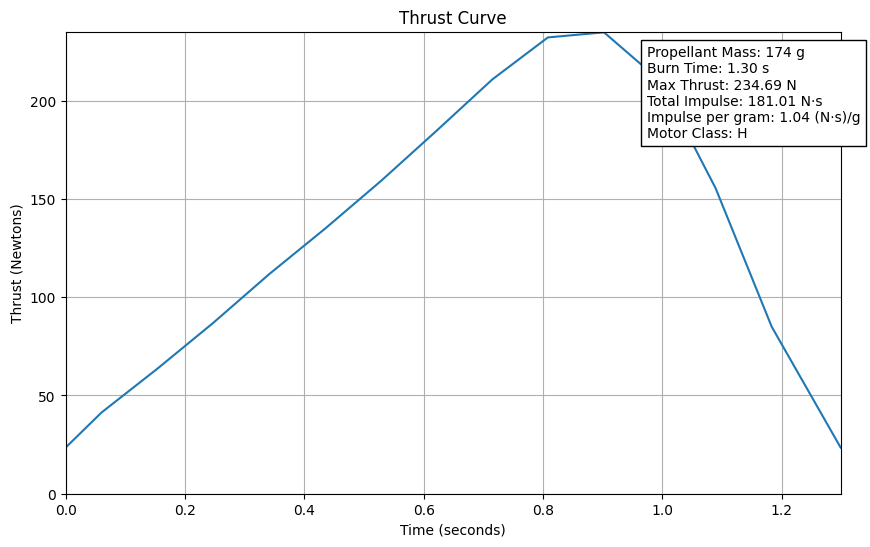

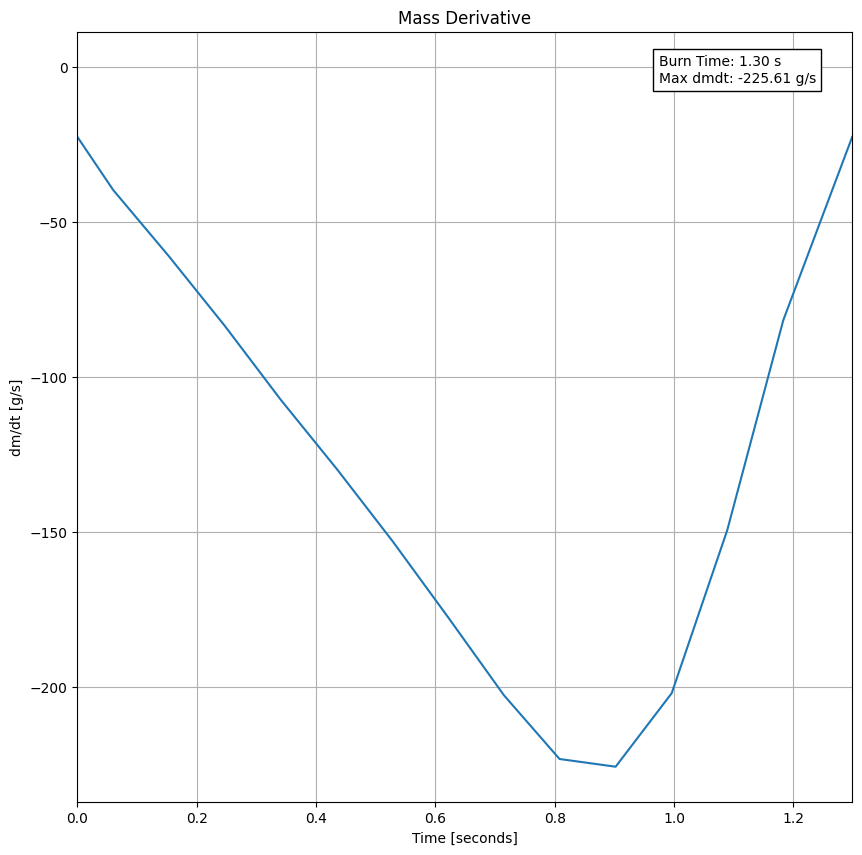

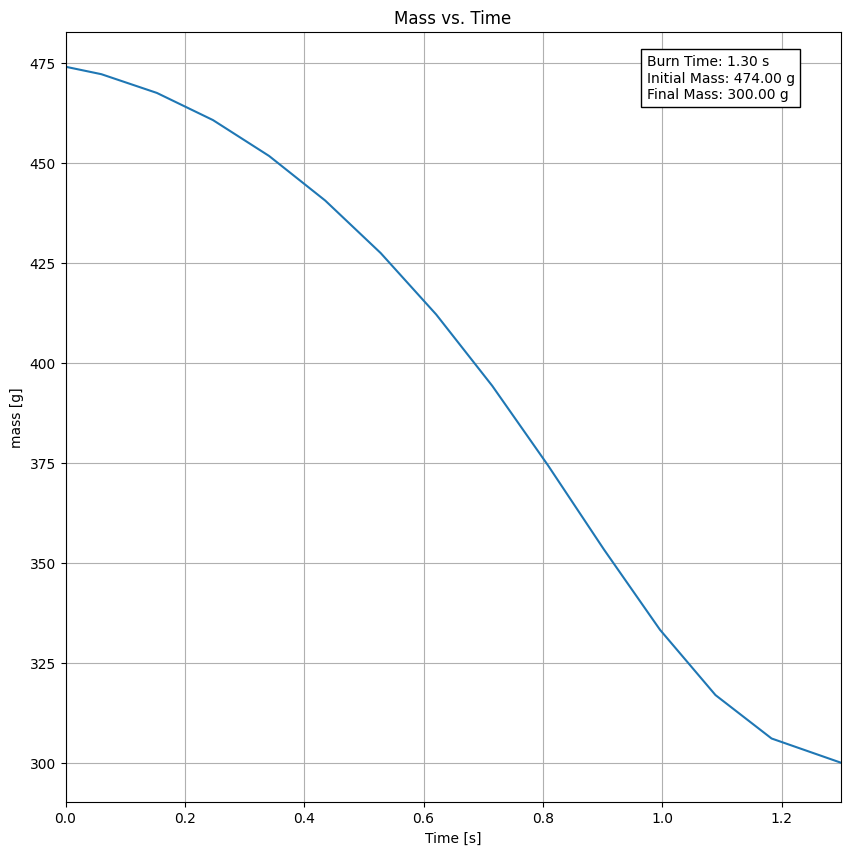

1040.2854796999043


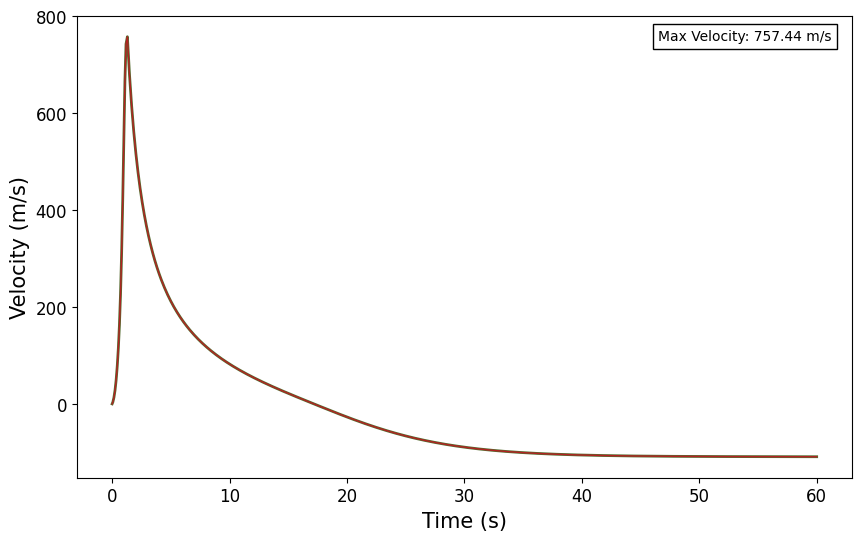

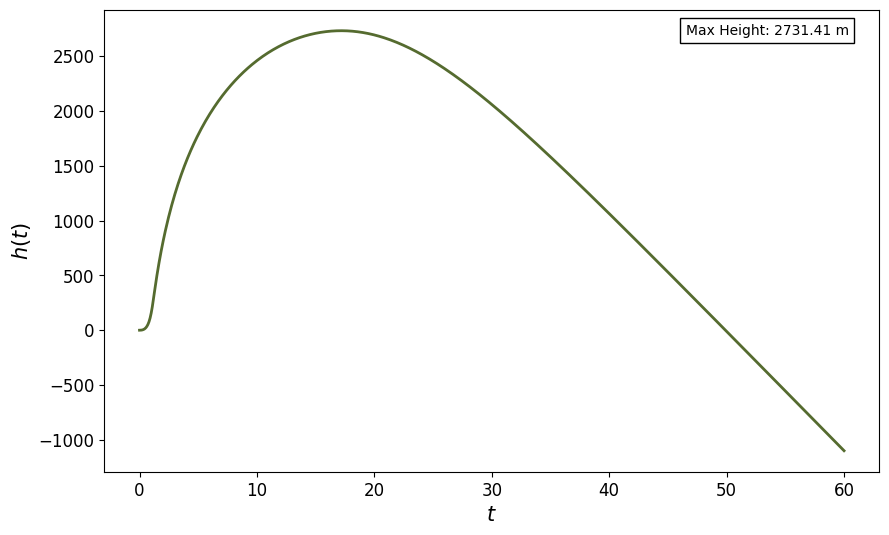

In [72]:
[x_lst, y_lst, propellant_mass, initial_t, final_t, t_initial, t_final, propellant_mass_g, max_thrust, total_impulse, Impulse_per_Gram, motor_class, burn_time, Answer_Save_Graph, Answer_Save_Data, file_name_full, percent_threshold, str_threshold, file_name_end, dry_mass, dry_mass_g, total_mass, total_mass_g, Cd, A, rho] = rocket_lab_program()

interp_func_th = interp_func_th_program(x_lst,y_lst)

mass_derivative_constant = get_mass_derivative_constant(interp_func_th,initial_t,final_t,dry_mass,total_mass)

dmdt = mass_derivative(interp_func_th, mass_derivative_constant, x_lst)

[mass_function, mass_list] = mass_func_program(mass_derivative, initial_t, x_lst,total_mass, interp_func_th)

[speed_list, speed_function, idx] = speed_program(x_lst, interp_func_th, mass_function, mass_derivative_constant, dry_mass, final_t, Cd ,rho ,A)

[height_function, height] = height_program(x_lst, speed_function, speed_list, initial_t)

thrust_graph(x_lst, y_lst, max_thrust, propellant_mass_g, total_impulse, Impulse_per_Gram, motor_class, initial_t, burn_time, Answer_Save_Graph, file_name_full, str_threshold, file_name_end)

mass_derivative_graph(dmdt, x_lst, burn_time)

mass_graph(mass_function, x_lst, initial_t, final_t, dry_mass, total_mass, burn_time)

velocity_graph(speed_function, x_lst, initial_t, final_t)

height_graph(height, x_lst, initial_t, final_t)

gas_velocity_function(mass_derivative_constant)

thrust_data_apend(x_lst, y_lst, file_name_full, str_threshold, Answer_Save_Data, file_name_end)